In [22]:
import torch
import numpy as np

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

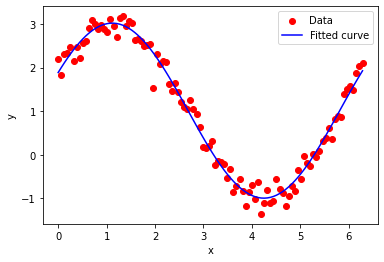

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the sinusoidal model function
def sinusoidal(x, amplitude, frequency, phase, offset):
    return amplitude * np.sin(frequency * x + phase) + offset

# Generate some example data
x = np.linspace(0, 2 * np.pi, 100)
true_amplitude = 2.0
true_frequency = 1.0
true_phase = 0.5
true_offset = 1.0

y = sinusoidal(x, true_amplitude, true_frequency, true_phase, true_offset)
noise = np.random.normal(0, 0.2, len(y))
y_noisy = y + noise

# Perform curve fitting
p0 = [1, 1, 0, 1]  # initial guesses for the parameters
params, cov_matrix = curve_fit(sinusoidal, x, y_noisy, p0=p0)

# Plot the data and the fitted sinusoidal curve
plt.scatter(x, y_noisy, label='Data', color='red')
plt.plot(x, sinusoidal(x, *params), label='Fitted curve', color='blue')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Epoch [1000/5000], Loss: 0.0087
Epoch [2000/5000], Loss: 0.0084
Epoch [3000/5000], Loss: 0.0082
Epoch [4000/5000], Loss: 0.0078
Epoch [5000/5000], Loss: 0.0072


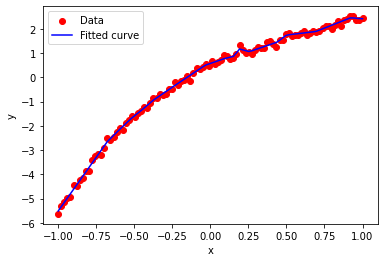

In [4]:


# Define the neural network model
class PolynomialFitter(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(PolynomialFitter, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Generate some example polynomial data
def generate_polynomial_data(num_samples, coeff, noise_std):
    x = np.linspace(-1, 1, num_samples)
    y = np.polyval(coeff, x) + np.random.normal(0, noise_std, num_samples)
    return x, y

# Set up the training data
num_samples = 100
coeff = [1, -2, 3, 0.5]
noise_std = 0.1

x_data, y_data = generate_polynomial_data(num_samples, coeff, noise_std)
x_tensor = torch.tensor(x_data, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y_data, dtype=torch.float32).view(-1, 1)

# Initialize the neural network
input_size = 1
hidden_size = 50
output_size = 1

model = PolynomialFitter(input_size, hidden_size, output_size)

# Set the loss function and optimizer
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the neural network
num_epochs = 5000

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    y_pred = model(x_tensor)
    loss = loss_function(y_pred, y_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Test the model
model.eval()
with torch.no_grad():
    y_test = model(x_tensor).numpy()

# Plot the data and the fitted polynomial curve
plt.scatter(x_data, y_data, label='Data', color='red')
plt.plot(x_data, y_test, label='Fitted curve', color='blue')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [6]:


# Define the neural network model
class MNISTClassifier(nn.Module):
    def __init__(self):
        super(MNISTClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Set up the training data
transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

# Initialize the neural network
model = MNISTClassifier()

# Set the loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 10

for epoch in range(num_epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f'Epoch: {epoch+1}, Batch: {batch_idx}, Loss: {loss.item():.4f}')

print("Training complete.")

# Evaluate the model
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=1000, shuffle=False)

model.eval()

correct = 0
total = 0

with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print(f"Accuracy on test set: {100 * correct / total}%")


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



NameError: name 'F' is not defined

In [ ]:


# Define the neural network model
class MNISTClassifier(nn.Module):
    def __init__(self):
        super(MNISTClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(7*7*32, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2, 2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2, 2)
        x = x.view(-1, 7*7*32)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False)

# Initialize the neural network
model = MNISTClassifier()

# Set the loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 10

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

# Test the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the model on the 10000 test images: {100 * correct / total}%')


Epoch [1/10], Step [100/600], Loss: 0.2557
Epoch [1/10], Step [200/600], Loss: 0.1348
Epoch [1/10], Step [300/600], Loss: 0.1300
Epoch [1/10], Step [400/600], Loss: 0.1815
Epoch [1/10], Step [500/600], Loss: 0.0623
Epoch [1/10], Step [600/600], Loss: 0.0898
Epoch [2/10], Step [100/600], Loss: 0.0756
Epoch [2/10], Step [200/600], Loss: 0.0968
Epoch [2/10], Step [300/600], Loss: 0.0460
Epoch [2/10], Step [400/600], Loss: 0.0313
Epoch [2/10], Step [500/600], Loss: 0.1041
Epoch [2/10], Step [600/600], Loss: 0.0207
Epoch [3/10], Step [100/600], Loss: 0.0389
Epoch [3/10], Step [200/600], Loss: 0.0485
Epoch [3/10], Step [300/600], Loss: 0.0161
Epoch [3/10], Step [400/600], Loss: 0.0491
Epoch [3/10], Step [500/600], Loss: 0.0364
Epoch [3/10], Step [600/600], Loss: 0.0466
Epoch [4/10], Step [100/600], Loss: 0.0417
Epoch [4/10], Step [200/600], Loss: 0.0318
Epoch [4/10], Step [300/600], Loss: 0.0355
Epoch [4/10], Step [400/600], Loss: 0.0714
Epoch [4/10], Step [500/600], Loss: 0.0123
Epoch [4/10